In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame()
df[data['feature_names']] = data['data']
df['label'] = data['target']

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [7]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
label                  int32
dtype: object

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score

<Axes: >

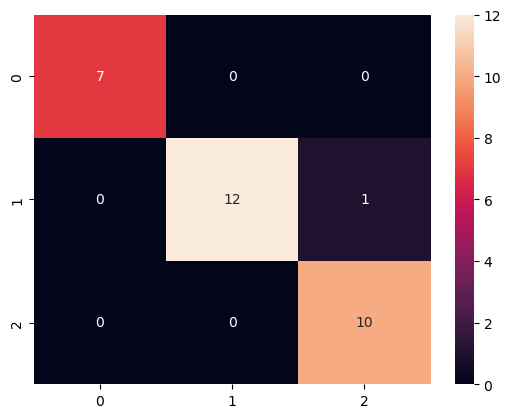

In [19]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [20]:
print(f'TP: {cm[0][0]}')

TP: 7


In [21]:
print(f'FN: {cm[1][0]+cm[2][0]}')

FN: 0


In [24]:
print(f'FP: {cm[0][1]+cm[0][2]}')

FP: 0


In [25]:
print(f'FP: {cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2]}')

FP: 23


In [26]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9666666666666667


In [28]:
error = 1-acc
print(error)

0.033333333333333326


In [30]:
precision_score(y_test,y_pred,average='macro')

0.9696969696969697

In [33]:
recall_score(y_test,y_pred,average='macro')

0.9743589743589745